In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm

In [2]:
file = pd.read_excel('配送费.xlsx',sheet_name='Sheet2') 
file.head(5)

,city,store,distance (米),delivery_fee (元),create_time,hour(时),longitude,latitude,brand
0,福州,德克士(爱琴海店),1059,2.1,2020-06-05 06:55:43.513,6,119.279394,26.041735,德克士
1,福州,德克士(爱琴海店),1963,3.1,2020-06-03 07:24:21.077,7,119.279394,26.041735,德克士
2,福州,德克士(爱琴海店),1963,3.1,2020-06-02 07:49:41.177,7,119.279394,26.041735,德克士
3,福州,德克士(爱琴海店),1963,1.1,2020-06-07 07:38:01.363,7,119.279394,26.041735,德克士
4,福州,德克士(爱琴海店),2626,3.6,2020-06-04 07:00:20.990,7,119.279394,26.041735,德克士


In [3]:
file.columns=['city','store','distance','fee','time','hour','lon','lat','brand']

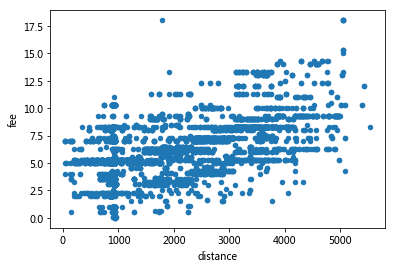

In [4]:
BK = file.loc[ (file['brand'] == '汉堡王') & (file['distance']<= 5800) & (file['fee']<40)]
BK.plot(x='distance', y='fee', kind='scatter')
plt.show()

In [5]:
BK = pd.merge(BK, pd.get_dummies(BK, prefix='dummy', prefix_sep='.', columns=['city', 'hour']), how='left')
BK.head(1)

,city,store,distance,fee,time,hour,lon,lat,brand,dummy.上海,...,dummy.14,dummy.15,dummy.16,dummy.17,dummy.18,dummy.19,dummy.20,dummy.21,dummy.22,dummy.23
0,上海,汉堡王（118广场店20864）,736,8.3,2020-06-05 00:02:03.650,0,121.378364,31.232268,汉堡王,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
reg1 = sm.OLS(endog=BK['fee'], exog=sm.add_constant(BK[BK.columns[BK.columns.str.contains('distance|dummy')]]), missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     423.4
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:40:01   Log-Likelihood:                -9324.2
No. Observations:                5337   AIC:                         1.871e+04
Df Residuals:                    5307   BIC:                         1.891e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4912      0.056     62.549      0.0

C:\Users\user.DESKTOP-UU63PHI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


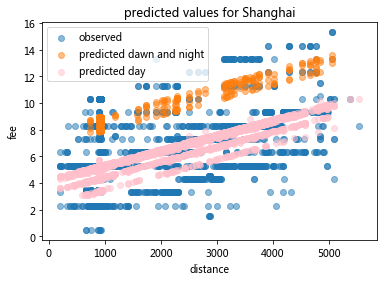

In [7]:
# 上海
bk_plot = BK.loc[BK['dummy.上海']==1]
plt.scatter(bk_plot['distance'], bk_plot['fee'], alpha=0.5, label='observed')
plt.scatter(bk_plot[((bk_plot['hour']>20)|(bk_plot['hour']<=5) )]['distance'], 
            results.predict(exog = sm.add_constant(BK[(BK['dummy.上海']==1) & ((BK['hour']>20)|(BK['hour']<=5))][BK.columns[BK.columns.str.contains('distance|dummy')]],has_constant='add')),
            alpha=0.5, label='predicted dawn and night')
plt.scatter(bk_plot[((bk_plot['hour']>5)& (bk_plot['hour']<=20) )]['distance'], 
            results.predict(exog = sm.add_constant(BK[(BK['dummy.上海']==1) & (BK['hour']>5)& (BK['hour']<=20)][BK.columns[BK.columns.str.contains('distance|dummy')]],has_constant='add')),
            alpha=0.5, label='predicted day',color = 'pink')
plt.legend() 
plt.title('predicted values for Shanghai')
plt.xlabel('distance')
plt.ylabel('fee')
plt.show()